# Overview

The exploratory data assessment serves as the foundation of the analysis by providing a clear understanding of the dataset structure, data quality, and initial patterns relevant to the campaign effectiveness objectives. The process includes reviewing variable distributions, checking for missing values, and identifying potential outliers. This step ensures that the data is in a suitable condition before moving into the subsequent analytical stages.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [ ]:
df = pd.read_csv(r'/content/ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# Checking Missing Values

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# Evaluate Data Distribution based on customer monetary and customer activity

## Customer Monetary

In [ ]:
customer_monetary = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'MntTotal']]

In [ ]:
customer_monetary.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
0,58138.0,635,88,546,172,88,88,1529
1,46344.0,11,1,6,2,1,6,21
2,71613.0,426,49,127,111,21,42,734
3,26646.0,11,4,20,10,3,5,48
4,58293.0,173,43,118,46,27,15,407


In [ ]:
customer_monetary.describe().round(3)

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
count,2205.000,2205.000,2205.000,2205.000,2205.000,2205.000,2205.000,2205.000
mean,51622.095,306.165,26.403,165.312,37.756,27.128,44.057,562.765
std,20713.064,337.494,39.784,217.785,54.825,41.130,51.736,575.937
min,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
25%,35196.000,24.000,2.000,16.000,3.000,1.000,9.000,56.000
50%,51287.000,178.000,8.000,68.000,12.000,8.000,25.000,343.000
75%,68281.000,507.000,33.000,232.000,50.000,34.000,56.000,964.000
max,113734.000,1493.000,199.000,1725.000,259.000,262.000,321.000,2491.000


There is a wide spread in customer spending over the past two years. Average total spending is approximately USD 563, with a median of USD 343, while some customers spend up to USD 2,491, indicating the presence of a strong high-spending segment. Wine stands out as the largest spending category with an average of USD 306, followed by Meat at USD 166. In contrast, categories such as Fruits (USD 26), Fish (USD 38), and Sweets (USD 27) show much lower spending levels. The sizeable gap between minimum and maximum values across categories suggests uneven spending behavior driven by a smaller group of high-value customers.

## Customer Activity

In [ ]:
customer_activity = df[['Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [ ]:
customer_activity.describe().round(3)

,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2205.000,2205.000,2205.000,2205.000,2205.000
mean,49.009,4.101,2.645,5.824,5.337
std,28.932,2.737,2.799,3.242,2.414
min,0.000,0.000,0.000,0.000,0.000
25%,24.000,2.000,0.000,3.000,3.000
50%,49.000,4.000,2.000,5.000,6.000
75%,74.000,6.000,4.000,8.000,7.000
max,99.000,27.000,28.000,13.000,20.000


The customer activity highlights varied levels of engagement across the customer base. On average, the last purchase occurred 49 days ago, with values ranging from 0 to 99 days, indicating a mix of highly active customers and those who have been inactive for some time. Store purchases are the most frequent channel with an average of 6 transactions, followed by website purchases at 4 transactions, and catalog purchases at 3 transactions. Website visits remain relatively high, averaging 5 visits per month, with some customers reaching up to 20 visits. The quartile distribution shows that half of the customers make 4 online purchases, 2 catalog purchases, 5 store purchases, and 6 monthly website visits, reflecting a generally steady level of engagement for a significant portion of the customer base.

# Outliers

## Customers Monetary

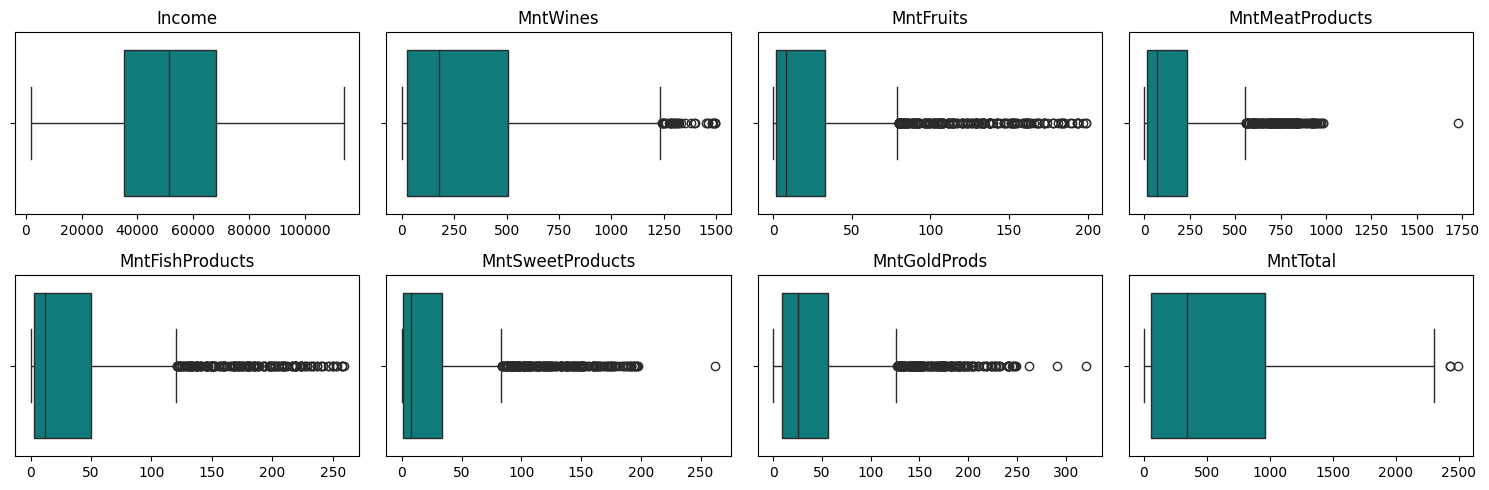

In [ ]:
fig, axes = plt.subplots(
    nrows=(len(customer_monetary.columns)+3)//4,
    ncols=4,
    figsize=(15, 5)
)

axes = axes.flatten()

for ax, col in zip(axes, customer_monetary.columns):
    sns.boxplot(x=customer_monetary[col], color='darkcyan', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

## Customers Activity

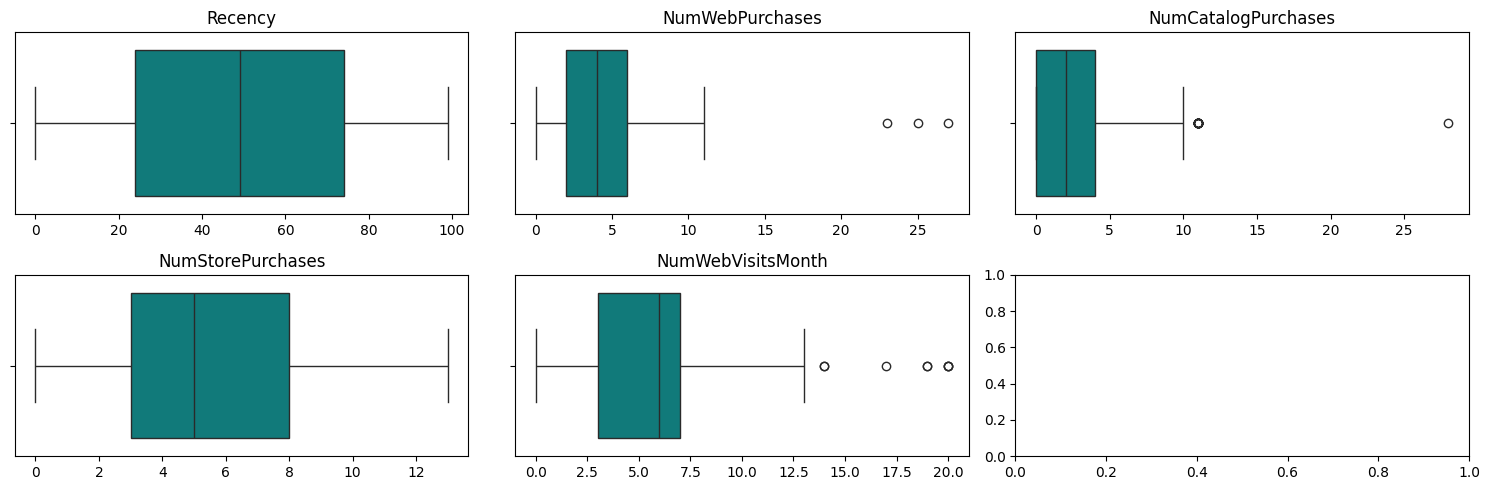

In [ ]:
fig, axes = plt.subplots(
    nrows=(len(customer_activity.columns)+3)//4,
    ncols=3,
    figsize=(15, 5)
)

axes = axes.flatten()

for ax, col in zip(axes, customer_activity.columns):
    sns.boxplot(x=customer_activity[col], color='darkcyan', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

The outliers in this dataset will remain as they are. There are two reasons behind this decision.
First, the values reflect realistic customer behavior. In the monetary variable, it is reasonable that some customers made high-value purchases within the last two years. The same applies to the activity variable, where certain customers frequently shop across their preferred channels. High transaction frequency from these customers results in a naturally elevated activity count. Removing these points could distort the actual distribution of customer behavior.

Second, the objective of this analysis is to evaluate campaign efficiency in attracting customers and managing costs. Since the focus is on relative campaign performance rather than statistical modeling, retaining the outliers helps ensure that the analysis captures the full range of real purchasing and engagement patterns.

# Summary

The Exploratory Data Analysis indicates that the dataset is in good condition and ready for further analysis. No missing values were identified, and all data types are appropriate. The outliers observed reflect high-value customer behavior that is reasonable from a business perspective, so these data points are retained in the dataset.